In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/Users/purzelrakete/src/github.com/feldberlin/wavenet


In [2]:
import os

import numpy as np
import torch
import librosa
from torch.nn import functional as F
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

from wavenet import model, train, sample, audio, datasets, utils, viz

# Train on a single Track

Run this on a GPU. The main point is to try to overfit a single track.

In [3]:
dry = True
if dry:
    os.environ['WANDB_MODE'] = 'dryrun'

In [4]:
p = model.HParams(n_audio_chans=2)
ds, ds_test = datasets.tracks('fixtures/aria.wav', 0.2, p)
X, Y = ds[:]
X.shape

torch.Size([466, 2, 16000])

In [5]:
m = model.Wavenet(p)
t = train.Trainer(m, ds, ds_test, train.HParams(max_epochs=1, batch_size=8, num_workers=8, learning_rate=0.0026), None)

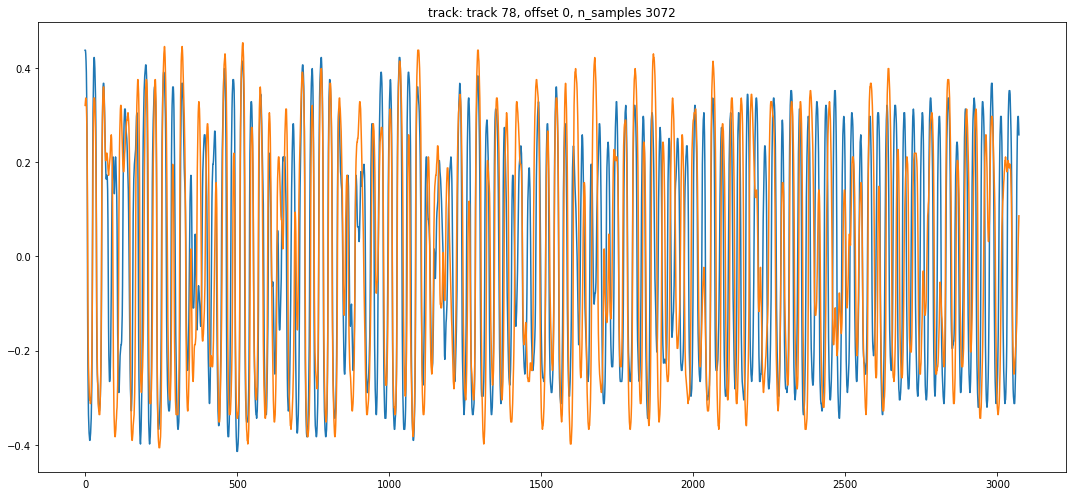

In [6]:
track_i = viz.plot_track(X[:], n_samples=p.receptive_field_size())

In [7]:
ipd.Audio(audio.mu_expand(X[track_i][:p.receptive_field_size()].numpy(), p), rate=p.sampling_rate)

In [ ]:
t.train()

/Users/purzelrakete/src/github.com/feldberlin/wavenet/.venv/lib/python3.7/site-packages/torch/cuda/amp/grad_scaler.py:116: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")
wandb: Offline run mode, not syncing to the cloud.
wandb: W&B syncing is set to `offline` in this directory.  Run `wandb online` to enable cloud syncing.
wandb: WARNING Symlinked 2 files into the W&B run directory, call wandb.save again to sync new files.
/Users/purzelrakete/src/github.com/feldberlin/wavenet/.venv/lib/python3.7/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow o

In [ ]:
_, track = sample.simple(m, =utils.decode_random, n_samples=32000, batch_size=10)

In [ ]:
viz.plot_track(track, n_samples=p.receptive_field_size() // 6)

In [ ]:
ipd.Audio(track[0], rate=p.sampling_rate)